In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
import warnings
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

# Loading the Data

In [2]:
data = pd.read_csv('Data.csv',parse_dates=["Timestamp"])
df_main = pd.DataFrame(data)
df_main

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [3]:
state=pd.read_csv('State_data.csv')
df_state=pd.DataFrame(state)
df_state

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252
5,Tamil Nadu,72147030,130058
6,Rajasthan,68548437,342239
7,Karnataka,61095297,191791
8,Gujarat,60439692,196024
9,Andhra Pradesh,49577103,162975


In [36]:
NCAP=pd.read_csv('NCAP_Funding.csv')
df_ncap=pd.DataFrame(NCAP)
df_ncap

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91
...,...,...,...,...,...,...,...,...
112,113,West Bengal,Kolkata,6,-,-,6.00,19
113,114,West Bengal,Howrah,-,5,-,5.00,19
114,115,West Bengal,Haldia,-,3,-,3.00,19
115,116,West Bengal,Durgapur,-,3,-,3.00,19


# Spatial Aggregation

## Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [31]:
# Write your code here
avg_pm25 = df_main.groupby('state')['PM2.5'].mean()
avg_pm25

state
Andhra Pradesh        35.049347
Arunachal Pradesh     22.674513
Assam                 57.962372
Bihar                 76.918759
Chandigarh            56.666803
Chhattisgarh          28.761571
Delhi                104.100918
Gujarat               52.462657
Haryana               72.371070
Himachal Pradesh      62.516878
Jammu and Kashmir     28.574696
Jharkhand             54.281545
Karnataka             28.894840
Kerala                29.404793
Madhya Pradesh        45.874375
Maharashtra           43.491415
Manipur               34.911856
Meghalaya             24.513390
Mizoram               11.784922
Nagaland              33.439550
Odisha                52.109504
Puducherry            22.854171
Punjab                52.243166
Rajasthan             54.230341
Sikkim                13.474286
Tamil Nadu            31.289620
Telangana             38.114469
Tripura               57.927642
Uttar Pradesh         70.893996
Uttarakhand           36.788767
West Bengal           54.611086
Na

## Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [5]:
df_main_2023=df_main[df_main["Timestamp"].dt.year == 2023]
df_main_2023_haz=df_main_2023[df_main_2023['PM2.5']>300]
hazardous_days_per_state=df_main_2023_haz.groupby("state")["Timestamp"].nunique()
# print(hazardous_days_per_state)
most_hazardous_state=hazardous_days_per_state.idxmax()
most_hazardous_days=hazardous_days_per_state.max()
print(f"The state with the most days of hazardous PM2.5 levels in 2023 is {most_hazardous_state} with {most_hazardous_days} days.")

The state with the most days of hazardous PM2.5 levels in 2023 is Delhi with 49 days.


## Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [6]:
variability_per_state=df_main_2023.groupby(['state','station'])['PM2.5'].std()
state_variability=variability_per_state.groupby("state").mean()
highest_variability_state=state_variability.idxmax()
highest_variability_value=state_variability.max()
print(f"The state with the highest PM2.5 variability across its monitoring stations in 2023 is {highest_variability_state} with a variability of {highest_variability_value:.2f}.")

The state with the highest PM2.5 variability across its monitoring stations in 2023 is Delhi with a variability of 79.97.


## Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [7]:
df_main_2020=df_main[df_main["Timestamp"].dt.year==2020]
df_main_2021=df_main[df_main["Timestamp"].dt.year==2021]
df_main_covid=pd.concat([df_main_2020,df_main_2021],ignore_index=True)
state_average=df_main_covid.groupby('state')['PM2.5'].mean()
highest_average_state=state_average.idxmin()
highest_average_value=state_average.min()
print(f"The state with the lowest PM2.5 during covid is {highest_average_state} with an average of {highest_average_value:.2f}.")

The state with the lowest PM2.5 during covid is Mizoram with an average of 14.32.


# Temporal Aggregation

## Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [8]:
station_high_august=df_main_2020.loc[df_main_2020[df_main_2020['Timestamp'].dt.month==8]['PM2.5'].idxmax(),'station']
value_high_august=df_main_2020[df_main_2020['Timestamp'].dt.month==8]['PM2.5'].max()
print(f"The station that reported the highest value of PM2.5 in the month of august of 2020 is {station_high_august} and the maximum value is{value_high_august}")

The station that reported the highest value of PM2.5 in the month of august of 2020 is Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB and the maximum value is805.51


## For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.

Method 1 (My method)

In [9]:
df_main_2018=df_main[df_main['Timestamp'].dt.year==2018]
station_names="Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_main_2018_stations=df_main_2018[df_main_2018['station']==station_names]

# Different seasons
df_main_2018_summer=df_main_2018_stations[df_main_2018_stations['Timestamp'].dt.month.between(3,5)]['PM2.5'].mean()
df_main_2018_monsoon=df_main_2018_stations[df_main_2018_stations['Timestamp'].dt.month.between(6,9)]['PM2.5'].mean()
df_main_2018_winter=pd.concat([df_main_2018_stations[df_main_2018_stations['Timestamp'].dt.month.between(1,2)],df_main_2018_stations[df_main_2018_stations['Timestamp'].dt.month==12]],ignore_index=True)['PM2.5'].mean()
df_main_2018_summer=0 if np.isnan(df_main_2018_summer) else df_main_2018_summer
print(f'''Average PM2.5 for Summer is: {df_main_2018_summer}
Average PM2.5 for Winter is: {df_main_2018_winter}
Average PM2.5 for Monsoom is: {df_main_2018_monsoon}
The season with maximum pollutant is: {max(df_main_2018_summer,df_main_2018_winter,df_main_2018_monsoon)}''')


Average PM2.5 for Summer is: 0
Average PM2.5 for Winter is: 67.4923443634478
Average PM2.5 for Monsoom is: 34.42519611317571
The season with maximum pollutant is: 67.4923443634478


Method 2 (Chatgpt)
This thing is much more efficient and gives me more flexibility than the previous code that I wrote

In [10]:
station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_main_2018_station = df_main_2018[df_main_2018["station"] == station_name]

# Define seasonal mapping this thing I don't know
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "Other"  # Not needed but added for clarity

# Create a new column for season
df_main_2018_station["season"] = df_main_2018_station["Timestamp"].dt.month.apply(get_season)  # I did not knew this practical application of apply function
seasonal_avg_pm25 = df_main_2018_station.groupby("season")["PM2.5"].mean()

# Identify the season with the highest pollution
highest_pollution_season = seasonal_avg_pm25.idxmax()

print("Average PM2.5 concentration per season in 2018:")
print(seasonal_avg_pm25)
print(f"\nThe season with the highest pollution is: {highest_pollution_season}")


Average PM2.5 concentration per season in 2018:
season
Monsoon    34.425196
Other      56.825144
Summer           NaN
Winter     67.492344
Name: PM2.5, dtype: float64

The season with the highest pollution is: Winter


## [Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?

## Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends.

WEEKLY Trend

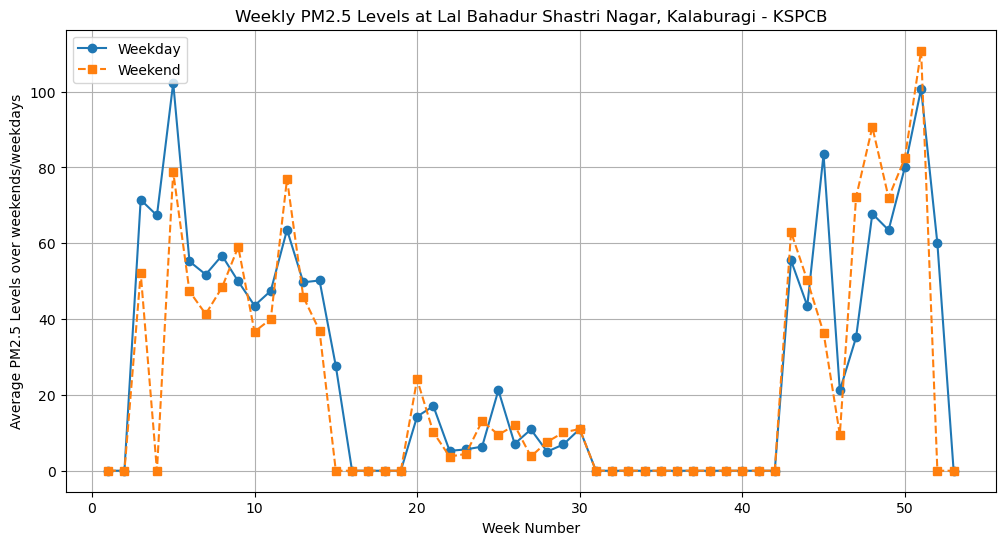

Weekday
Weekday    42.789802
Weekend    41.134580
Name: PM2.5, dtype: float64


In [35]:
station_name="Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_main_2021_station = df_main_2021[df_main_2021["station"] == station_name]

def get_weekday(day):
    if day in [0,1,2,3,4]:
        return 'Weekday'
    elif day in [5,6]:
        return 'Weekend'
    
df_main_2021_station['Weekday']=df_main_2021_station['Timestamp'].dt.weekday.apply(get_weekday)
df_main_2021_station['Week no.']=df_main_2021_station['Timestamp'].dt.isocalendar().week
grouped_data=df_main_2021_station.groupby(['Week no.','Weekday'])['PM2.5'].mean().unstack().fillna(0)
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Weekday'], label='Weekday', marker='o', linestyle='-')
plt.plot(grouped_data.index, grouped_data['Weekend'], label='Weekend', marker='s', linestyle='--')
plt.xlabel('Week Number')
plt.ylabel('Average PM2.5 Levels over weekends/weekdays')
plt.title(f'Weekly PM2.5 Levels at {station_name}')
plt.legend()
plt.grid(True)
plt.show()

print(df_main_2021_station.groupby('Weekday')['PM2.5'].mean())


MONTHLY Trend


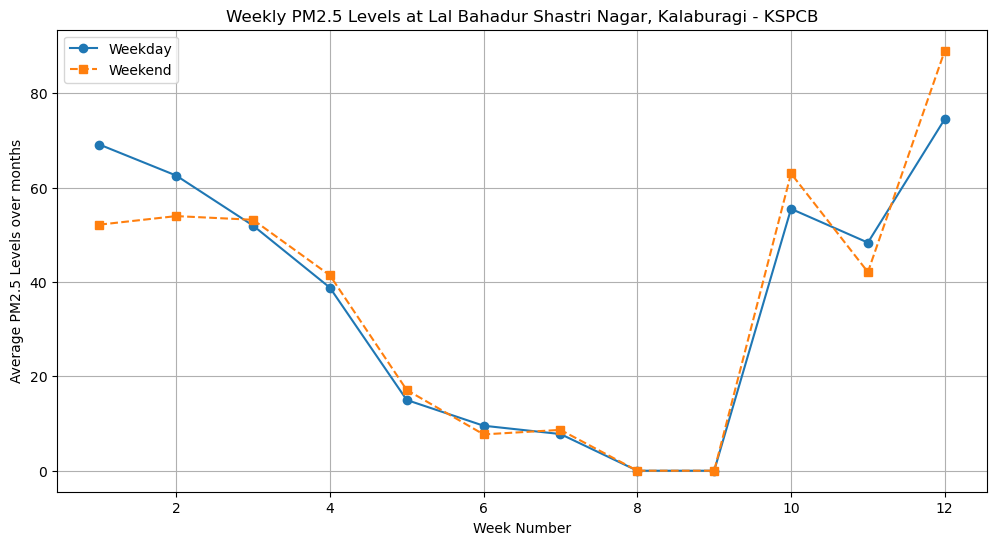

Weekday
Weekday    42.789802
Weekend    41.134580
Name: PM2.5, dtype: float64


In [12]:
df_main_2021_station['Month no.']=df_main_2021_station['Timestamp'].dt.month
grouped_data=df_main_2021_station.groupby(['Month no.','Weekday'])['PM2.5'].mean().unstack().fillna(0)
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Weekday'], label='Weekday', marker='o', linestyle='-')
plt.plot(grouped_data.index, grouped_data['Weekend'], label='Weekend', marker='s', linestyle='--')
plt.xlabel('Week Number')
plt.ylabel('Average PM2.5 Levels over months')
plt.title(f'Weekly PM2.5 Levels at {station_name}')
plt.legend()
plt.grid(True)
plt.show()

print(df_main_2021_station.groupby('Weekday')['PM2.5'].mean())

# Spatio-Temporal Aggregation

## For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [13]:
df_main_2022=df_main[df_main["Timestamp"].dt.year == 2022]
def get_season(month):
    if month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
df_main_2022["season"]=df_main_2022["Timestamp"].dt.month.apply(get_season) 
grouped_data=df_main_2022.groupby(['state','season'])['PM2.5'].mean().unstack().fillna(0)
grouped_data['Change']=((grouped_data['Summer']-grouped_data['Monsoon'])*100)/grouped_data['Monsoon']
print(f'The percentage value for PM2.5 is increased by {grouped_data["Change"].max():.4f} in summer than winter in {grouped_data["Change"].idxmax()} state in the year 2022')

The percentage value for PM2.5 is increased by 157.5754 in summer than winter in Assam state in the year 2022


## Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

Season    Monsoon     Summer      Winter
Year                                    
2017    52.058519  98.525562  168.601736
2018    51.366940  92.307981  189.692843
2019    46.200330  84.982546  179.034521
2020    38.362705  53.583184  158.383736
2021    41.243770  78.184788  182.867699
2022    42.769572  95.667628  147.476104
2023    40.538087  70.216212  166.011412


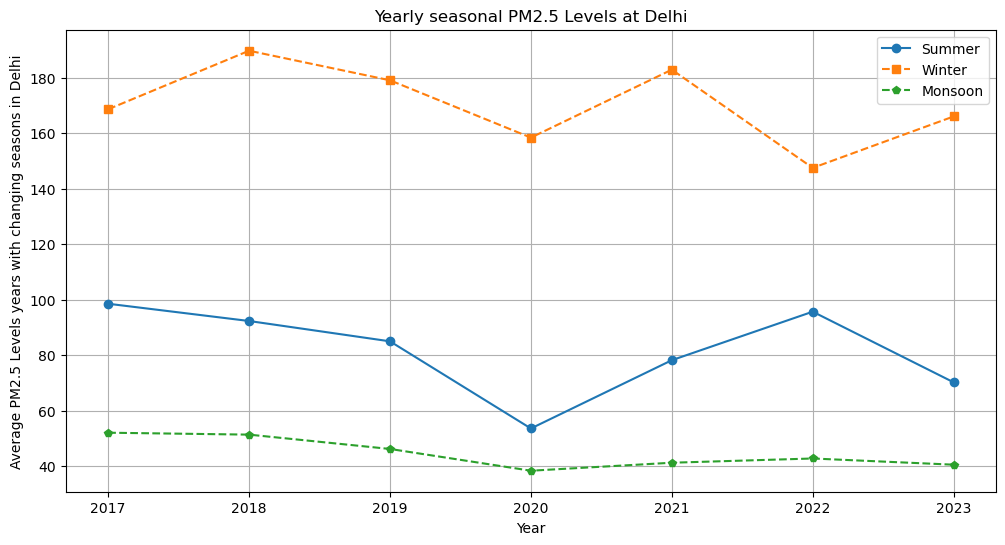

In [14]:
def get_season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Summer"
    elif month in [6,7,8,9]:
        return 'Monsoon'
df_main_17_23=df_main[df_main['Timestamp'].dt.year.between(2017,2023)]
df_main_17_23_delhi=df_main_17_23[df_main_17_23['state']=='Delhi']
df_main_17_23_delhi['Season']=df_main_17_23_delhi['Timestamp'].dt.month.apply(get_season)
df_main_17_23_delhi['Year']=df_main_17_23_delhi['Timestamp'].dt.year
grouped_data=df_main_17_23_delhi.groupby(['Year','Season'])['PM2.5'].mean().unstack()
print(grouped_data)
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Summer'], label='Summer', marker='o', linestyle='-')
plt.plot(grouped_data.index, grouped_data['Winter'], label='Winter', marker='s', linestyle='--')
plt.plot(grouped_data.index, grouped_data['Monsoon'], label='Monsoon', marker='p', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels years with changing seasons in Delhi')
plt.title(f'Yearly seasonal PM2.5 Levels at Delhi')
plt.legend()
plt.grid(True)
plt.show()


## Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2017 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

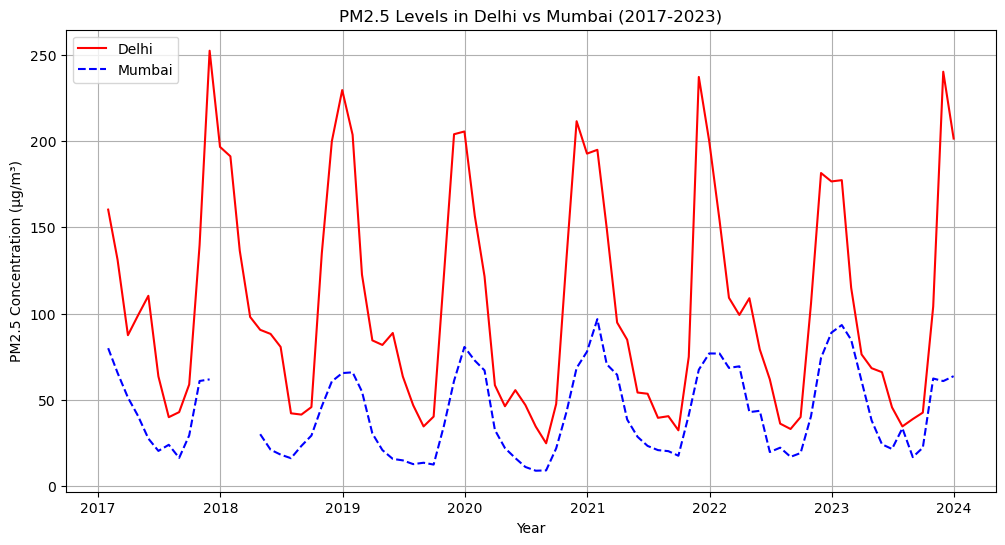

Delhi has a standard deviation of 62.975376011853136 where as mumbai has 24.5258009141125 w can clearly see that Delhi has more seasonal flactuations in PM2.5 levels that Mumbai 


In [15]:
df_main_17_23_comp=df_main_17_23[df_main_17_23['city'].isin(['Mumbai','Delhi'])]
df_grouped_1= df_main_17_23_comp.groupby([pd.Grouper(key="Timestamp", freq="M"),"city"])["PM2.5"].mean().unstack()
df_grouped_2=df_main_17_23_comp.groupby(["city", pd.Grouper(key="Timestamp", freq="M")])["PM2.5"].mean().reset_index()
df_pivot = df_grouped_2.pivot(index="Timestamp", columns="city", values="PM2.5")  # For easy plotting
plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot["Delhi"], label="Delhi", color="red", linestyle="-")
plt.plot(df_pivot.index, df_pivot["Mumbai"], label="Mumbai", color="blue", linestyle="--")
plt.xlabel("Year")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.title("PM2.5 Levels in Delhi vs Mumbai (2017-2023)")
plt.legend()
plt.grid(True)
plt.show()

fluc_delhi=df_pivot["Delhi"].std()
fluc_Mumbai=df_pivot["Mumbai"].std()

print(f'Delhi has a standard deviation of {fluc_delhi} where as mumbai has {fluc_Mumbai} w can clearly see that Delhi has more seasonal flactuations in PM2.5 levels that Mumbai ')
# plt.figure(figsize=(12, 6))
# plt.plot(df_grouped_1.index, df_grouped_1['Delhi'], label='Delhi',color='r' ,linestyle='-')
# plt.plot(df_grouped_1.index, df_grouped_1['Mumbai'], label='Mumbai',color='g', linestyle='--')
# plt.xlabel("Year")
# plt.ylabel("PM2.5 Concentration (µg/m³)")
# plt.title("PM2.5 Levels in Delhi vs Mumbai (2017-2023)")
# plt.legend()
# plt.grid(True)
# plt.show()

# Population-Based

## Which state in India has the highest number of monitoring stations relative to its population?

In [38]:
station_num=df_main.groupby('state')['station'].nunique().reset_index()
merge=df_state.merge(station_num,left_on="State", right_on="state", how="inner").drop(columns=['state'])
merge['Station/Population']=merge['station']/merge['Population']
print(f"The state having highest number of monitoring stations relative to it's population is {merge.loc[merge['Station/Population'].idxmax(),'State']}" )
merge

The state having highest number of monitoring stations relative to it's population is Chandigarh


,State,Population,Area (km2),station,Station/Population
0,Uttar Pradesh,199812341,240928,57,2.852677e-07
1,Maharashtra,112374333,307713,97,8.631864e-07
2,Bihar,104099452,94163,36,3.458231e-07
3,West Bengal,91276115,88752,22,2.410269e-07
4,Madhya Pradesh,72626809,308252,29,3.993016e-07
5,Tamil Nadu,72147030,130058,36,4.989810e-07
6,Rajasthan,68548437,342239,46,6.710583e-07
7,Karnataka,61095297,191791,42,6.874506e-07
8,Gujarat,60439692,196024,17,2.812721e-07
9,Andhra Pradesh,49577103,162975,13,2.622178e-07


## Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

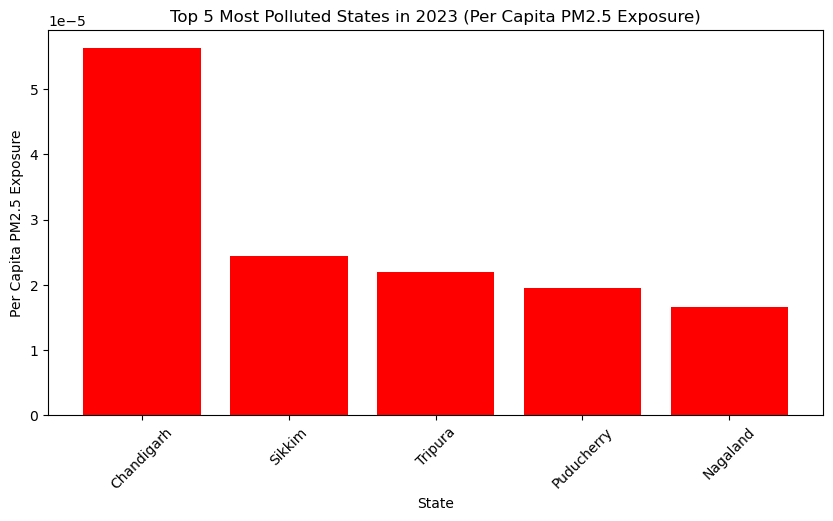

In [48]:
df_main_2023_polluted=df_main_2023.groupby('state')['PM2.5'].mean().reset_index()
merge_1=merge.merge(df_main_2023_polluted,left_on="State", right_on="state", how="inner").drop(columns=['state'])
merge_1['PM2.5 per capita']=merge_1['PM2.5']/merge_1['Population']
top_5_states = merge_1.nlargest(5, 'PM2.5 per capita')
top_5_states
plt.figure(figsize=(10, 5))
plt.bar(top_5_states['State'], top_5_states['PM2.5 per capita'], color='red')
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States in 2023 (Per Capita PM2.5 Exposure)")
plt.xticks(rotation=45)
plt.show()


## Plot the relationship between population density and average PM2.5 concentration for each state.

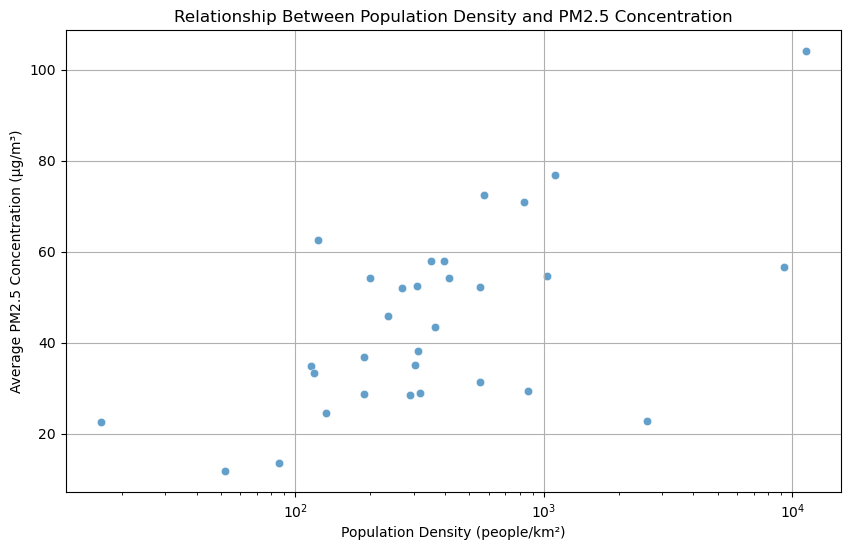

In [68]:
merge_1['Population density']=merge_1['Population']/merge_1['Area (km2)']
avg_pm25_1=avg_pm25.reset_index()
merge_1 = merge_1.drop(columns=['PM2.5'], errors='ignore')  # Ensure it doesn't exist before merging
merge_1 = merge_1.merge(avg_pm25_1, left_on="State", right_on="state", how="inner").drop(columns=['state'])
merge_1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merge_1, x='Population density', y='PM2.5', alpha=0.7)
plt.xlabel("Population Density (people/km²)")
plt.ylabel("Average PM2.5 Concentration (µg/m³)")
plt.title("Relationship Between Population Density and PM2.5 Concentration")
plt.xscale("log")  # Log scale for better visualization if density values vary widely
plt.grid(True)
plt.show()

# Area-Based

## Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.

In [18]:
# Write your code here


## Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area.

In [19]:
# Write your code here


## Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

In [20]:
# Write your code here


## Which state has the highest number of monitoring stations per unit area?

In [21]:
# Write your code here


# Funding-Based

## Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [22]:
# Write your code here


## Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

In [23]:
# Write your code here


## Create a scatter plot to showcase the area versus funding received by a state.

In [24]:
# Write your code here


# Miscellaneous Questions

## For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³).

In [25]:
# Write your code here


## Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

In [26]:
# Write your code here


## Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023.

In [27]:
# Write your code here


## Draw the map of India and plot the sensor locations on the map.

In [28]:
# Write your code here


# Tell us something new

## Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.

In [29]:
# Write your code here
